Linear Regression

In [9]:
import numpy as np
import random
# Fixed random
np.random.seed(1)
random.seed(1)
# Amount of points
N = 100000
# Parameters A from [-10, 10], B from [-100, 100]
A = (np.random.sample() - 0.5) * 20
B = (np.random.sample() - 0.5) * 200
# Initialize X from [-100, 100], Y with uniform distribution from [-30, 30]
X = (np.array([random.random() for i in range(N)]) - 0.5) * 200
Y = A * X + B + np.random.uniform(-30, 30, N)
print('Real A = ' + str(A) + " | Real B = " + str(B))

# Parameter alpha
alpha = 0.0001

# Initialize A_0 and B_0
A_0 = 0.
B_0 = 0.

for i in range(N):
    error = (A_0 * X[i] + B_0) - Y[i]
    B_0 -= alpha * error
    A_0 -= alpha * error * X[i]
    
print('Predicted A = ' + str(A_0) + " | Predicted B = " + str(B_0))

Y_0 = A_0 * X + B_0

Real A = -1.65955990594852 | Real B = 44.06489868843162
Predicted A = -1.6615288716544503 | Predicted B = 44.18509925680541


<IPython.core.display.Javascript object>


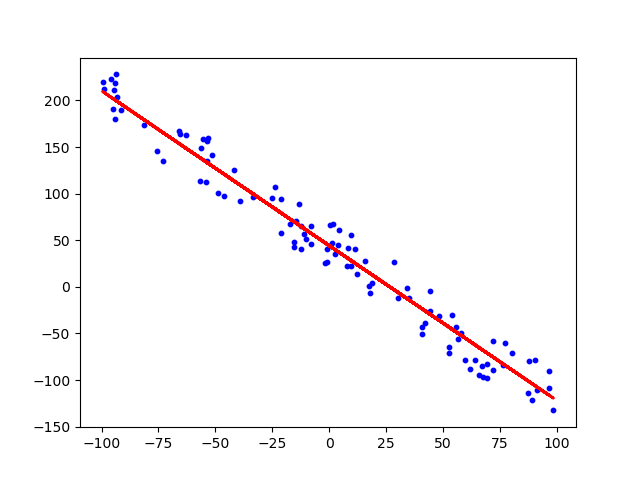

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(X[0:100], Y[0:100], s=10, color='blue')
plt.plot(X[0:100], Y_0[0:100], color='red', linewidth=2, markersize=10)

Logistic Regression

<IPython.core.display.Javascript object>


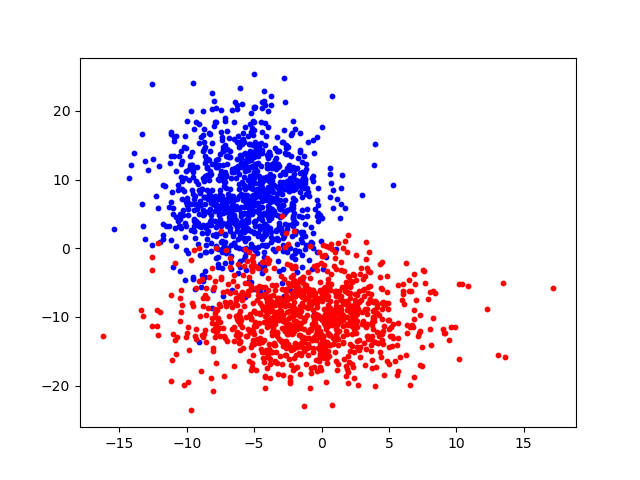

In [11]:
import numpy as np
import random
# Fixed random
np.random.seed(5)
random.seed(5)
# Amount of points
N = 1000
# Parameter alpha
Alpha = 0.1
# Generating X and Y
A_0 = [(np.random.sample() - 0.5) * 20, (np.random.sample() - 0.5) * 20]
A = [([np.random.normal(0, 1) * 3 + A_0[0], np.random.normal(0, 2) * 3 + A_0[1]]) for i in range(N)]

# Fixed random
np.random.seed(2)
random.seed(2)
B_0 = [(np.random.sample() - 0.5) * 20, (np.random.sample() - 0.5) * 20]
B = [([np.random.normal(0, 1.5) * 3 + B_0[0], np.random.normal(0, 1.5) * 3 + B_0[1]]) for i in range(N)]

%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(np.transpose(A)[0], np.transpose(A)[1], s=10, color='blue')
plt.scatter(np.transpose(B)[0], np.transpose(B)[1], s=10, color='red')

In [12]:
def Sigmoid(Z):
    return 1. / (1. + np.exp(-Z))
    
def Predict(X, W):
    X_matrix = np.c_[X, np.ones(X.shape[0])] 
    Z = np.dot(X_matrix, W)
    return [int(i > 0.5) for i in Sigmoid(Z)]

A_train = A[0:int(N * 0.8)]
B_train = B[0:int(N * 0.8)]
A_test = A[int(N * 0.8): None]
B_test = B[int(N * 0.8): None]

X_train = np.concatenate((A_train, B_train), axis=0)
Y_train = np.concatenate((np.array([0] * len(A_train)), np.array([1] * len(B_train))))

X_test = np.concatenate((A_test, B_test), axis=0)
Y_test = np.concatenate((np.array([0] * len(A_test)), np.array([1] * len(B_test))))

def Fit(X, Y):
    X_matrix = np.c_[X, np.ones(X.shape[0])]    
    W = np.random.rand(X_matrix.shape[1])
    M = len(X)
    
    for i in range(M):
        z = np.dot(X_matrix, W) 
        Y_1 = Sigmoid(z)
        W -= Alpha * np.dot(np.transpose(X_matrix),  (Y_1 - Y)) / M
            
    return W
    
W = Fit(X_train, Y_train)
                        
TP = 0
TN = 0
FP = 0
FN = 0
                        
P = Predict(X_test, W)

for i in range(len(P)):
    if (P[i] == Y_test[i]):
        if (P[i] == 1):
            TP += 1
        else:
            TN += 1
    else:
        if (P[i] == 1):
            FN += 1
        else:
            FP += 1

print("precision : " + str(float(TP) / float(TP + FP)))
print("recall : " + str(float(TP) / float(TP + FN)))
print("accuracy : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

A_ = np.transpose(A_test)
B_ = np.transpose(B_test)

precision : 0.965
recall : 0.946078431372549
accuracy : 0.955


<IPython.core.display.Javascript object>


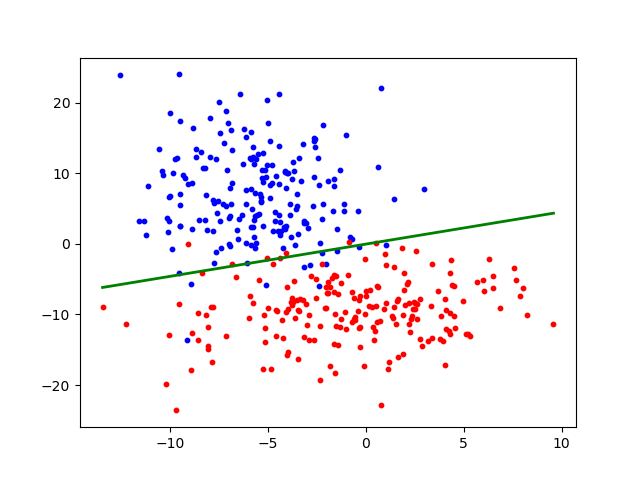

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(A_[0], A_[1], s=10, color='blue')
plt.scatter(B_[0], B_[1], s=10, color='red')
bord_a = min(np.concatenate([A_[0], B_[0]]))
bord_b = max(np.concatenate([A_[0], B_[0]]))
plt.plot([bord_a, bord_b], [W[2] - bord_a * W[0] / W[1], W[2] - bord_b * W[0] / W[1]],  color='green', linewidth=2, markersize=10)

Desicion Tree

<IPython.core.display.Javascript object>


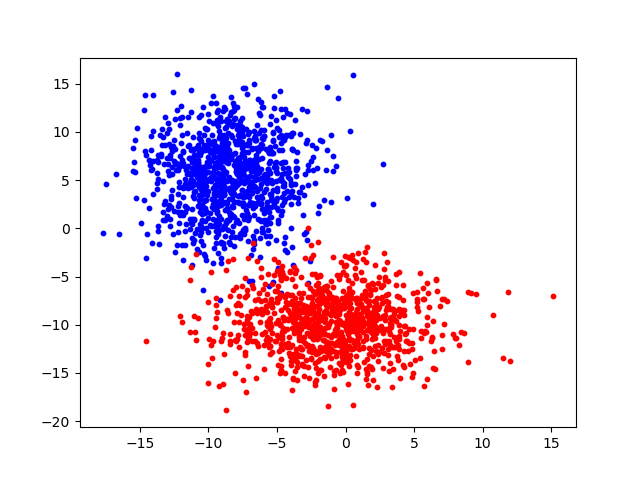

In [14]:
import numpy as np
import random
# Fixed random
np.random.seed(7)
random.seed(7)
# Amount of points
N = 1000
# Generating X and Y
A_0 = [(np.random.sample() - 0.5) * 20, (np.random.sample() - 0.5) * 20]
A = [([np.random.normal(0, 3) + A_0[0], np.random.normal(0, 4) + A_0[1]]) for i in range(N)]

# Fixed random
np.random.seed(2)
random.seed(2)
B_0 = [(np.random.sample() - 0.5) * 20, (np.random.sample() - 0.5) * 20]
B = [([np.random.normal(0, 4) + B_0[0], np.random.normal(0, 3) + B_0[1]]) for i in range(N)]

%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(np.transpose(A)[0], np.transpose(A)[1], s=10, color='blue')
plt.scatter(np.transpose(B)[0], np.transpose(B)[1], s=10, color='red')

A_train = A[0:int(N * 0.8)]
B_train = B[0:int(N * 0.8)]
A_test = A[int(N * 0.8): None]
B_test = B[int(N * 0.8): None]

X_train = np.concatenate((A_train, B_train), axis=0)
Y_train = np.concatenate((np.array([0] * len(A_train)), np.array([1] * len(B_train))))

X_test = np.concatenate((A_test, B_test), axis=0)
Y_test = np.concatenate((np.array([0] * len(A_test)), np.array([1] * len(B_test))))

In [15]:
class DesicionTreeNode(object):
    
    def __init__(self, Depth = 0):
        self.X = None
        self.Y = None
        
        self.Root = None
        self.Left = None
        self.Right = None
        
        self.Samples = None
        self.Gain = None        
        self.Threshold = None
        
        self.Depth = Depth
        
    def Impurity(self, Y):
        return (1. - sum([(float(len(Y[Y == y])) / float(Y.shape[0]))**2. for y in np.unique(Y)]))
    
    def Split(self, X, Y):
        # Splitting into left and right nodes
        Xleft = X[X[:, self.X] <= self.Threshold]
        Yleft = Y[X[:, self.X] <= self.Threshold]
        self.Left = DesicionTreeNode(self.Depth + 1)

        Xright = X[X[:, self.X] > self.Threshold]
        Yright = Y[X[:, self.X] > self.Threshold]
        self.Right = DesicionTreeNode(self.Depth + 1)
        # Growing both nodes
        self.Left.Grow(Xleft, Yleft)
        self.Right.Grow(Xright, Yright)
    
    def Grow(self, X, Y):
        self.Samples = X.shape[0] 
        # If only one Class then we stop recursion
        if len(np.unique(Y)) == 1:
            self.Y = Y[0]
            return
        # Initialize variables
        MaxGain = 0.
        BestX = None
        BestThreshold = None
        # Take Y, which occurs max amount of time
        self.Y = max([(y, len(Y[Y == y])) for y in np.unique(Y)], key = lambda x : x[1])[0]
        # Calculating current Impurity
        ImpurityCur = self.Impurity(Y)
        
        for j in range(X.shape[1]):
            Xs = (np.unique(X[:, j])[: -1] + np.unique(X[:, j])[1:]) / 2.
            # Find max Impurity Gain and take corresponding X and Threshhold
            for x in Xs:
                Yleft = Y[X[:, j] <= x]
                ImpurityLeft = self.Impurity(Yleft)
                PercLeft = float(Yleft.shape[0]) / self.Samples

                Yright = Y[X[:, j] > x]
                ImpurityRight = self.Impurity(Yright)
                PercRight = float(Yright.shape[0]) / self.Samples

                Gain = ImpurityCur - (PercLeft * ImpurityLeft + PercRight * ImpurityRight)
                if Gain > MaxGain:
                    MaxGain = Gain
                    BestX = j
                    BestThreshold = x
        # Save best X, Gain and Threshold and split our desicion tree
        self.X = BestX
        self.Gain = MaxGain
        self.Threshold = BestThreshold
        self.Split(X, Y)

    def Fit(self, X, Y):
        # Initialize first node
        self.Root = DesicionTreeNode()
        # Start recursive growing
        self.Root.Grow(X, Y)
        print(self.Depth)
        self.Root.Cut(self.Depth)

    def Predict(self, X):
        return np.array([self.Root.RecursiveFall(x) for x in X])

    def RecursiveFall(self, x):
        if self.X != None:
            if x[self.X] <= self.Threshold:
                return self.Left.RecursiveFall(x)
            else:
                return self.Right.RecursiveFall(x)
        else: 
            return self.Y
        
    def Cut(self, MaxDepth):
        # Stop recursive cut
        if self.X is None:
            return
        # We need to go to the furthest nodes to cut them first
        self.Left.Cut(MaxDepth)
        self.Right.Cut(MaxDepth)   
        # Than we cut current node
        if self.Depth >= MaxDepth:
            self.Left = None
            self.Right = None
            self.X = None

    def Print(self, Suffix = ""):
        Tab = "Depth: " + str(self.Depth) + "   " + "     " * self.Depth + Suffix
        if self.X != None:
            print(Tab + "If X[" + str(self.X) + "] <= " + str("{:.2f}".format(self.Threshold)))
            self.Left.Print("Then ")
            self.Right.Print("Else ")
        else:
            print(Tab + "Class: " + str(self.Y) + ", Samples: " + str(self.Samples))

In [16]:
Tree = DesicionTreeNode(3)
Tree.Fit(X_train, Y_train)
Tree.Root.Print()

Y = Tree.Predict(X_test)
print('Accuracy: ', np.mean(Y == Y_test))

3
Depth: 0   If X[1] <= -2.47
Depth: 1        Then If X[1] <= -4.17
Depth: 2             Then If X[1] <= -6.72
Depth: 3                  Then Class: 1, Samples: 694
Depth: 3                  Else Class: 1, Samples: 82
Depth: 2             Else If X[0] <= -2.57
Depth: 3                  Then Class: 0, Samples: 20
Depth: 3                  Else Class: 1, Samples: 16
Depth: 1        Else If X[0] <= -2.77
Depth: 2             Then If X[1] <= -1.45
Depth: 3                  Then Class: 0, Samples: 22
Depth: 3                  Else Class: 0, Samples: 744
Depth: 2             Else If X[1] <= 1.14
Depth: 3                  Then Class: 1, Samples: 4
Depth: 3                  Else Class: 0, Samples: 18
Accuracy:  0.9925
